In [1]:
import os
import shutil
import time
import mimetypes
import chardet

print(mimetypes.guess_type('test.py')) #작업 디렉토리 아래, .png, xlsx
#text/...
#image/...
#application/...

('text/x-python', None)


In [2]:
content = b'The asyncio package, ... is in the stdlib in Python 3.4 but not in 3'
print(content)
print(chardet.detect(content))

b'The asyncio package, ... is in the stdlib in Python 3.4 but not in 3'
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [3]:
result = str(content, 'ascii') #문자열 변환
print(result)

The asyncio package, ... is in the stdlib in Python 3.4 but not in 3


In [4]:
search_str = 'Zen of Python'.lower()
flist = []
for curdir, dirs, files in os.walk(r'C:\ProgramData\Anaconda3\Lib\asyncio'):
    for fname in files:
        fpath = os.path.join(curdir, fname)
        mime = mimetypes.guess_type(fpaht)
        if not mime[0] or not mime[0].startswith('text'):
            continue
        content = open(fpath, 'rb').read()  #bytes로 읽어서
        encoding = chardet.detect(contetn)['encoding'] #인코딩 테스트
        try:
            txt = str(content, encoding) #str로 변환
        except:
            continue
        if search_str in txt.lower(): #특정 문자열이 포함되었는지 테스트 하기
            print(fpath)
            flist.append(fpath)

# 워드 문서 자동화

In [5]:
from docx import Document
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.shared import Mm

doc = Document() #파이썬 프로그램에서 워드 문서 객체 생성
#add_paragraph(content, style=)
p = doc.add_heading('왕방산 국제 MTB대회', 0) #제목 스타일
p = doc.add_paragraph('왕방산에 만들어진 산악자전거 도로를 돌아보는 자전거 경주대회인',
                     style = 'Normal')
p.add_run('왕방산 국제 MTB대회').bold = True
p.add_run('는 명실상부한 최고의 산악자전거 대회로 자리매김하였습니다.')
p.add_run('천혜의 자연경관').italic = True
p.add_run('과 함께 왕방산의 정취를 느껴보시기 바랍니다.')

doc.add_heading('대회소개', level=1)
doc.add_paragraph('화이팅', style = 'Intense Quote')

doc.add_heading('대회 상세 안내', level=1)
doc.add_paragraph('접수처: 대한자전거연맹', style = 'List Bullet')
doc.add_paragraph('문의사항: 02-420-4247', style = 'List Bullet')



my_image = doc.add_picture('./img/cal_1.png', width=Mm(100))  #사진추가
last_paragraph = doc.paragraphs[-1]
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

doc.add_page_break()

my_image = doc.add_picture('./img/btn02.png', width=Mm(100))  #단위 Cm, Mm, Px, Emu
last_paragraph = doc.paragraphs[-1]
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER

records = (
('XC10', '690,000', '14.5kg'),
    ('XC20', '790,000', '13.5kg'),
    ('XC30', '890,000', '14.5kg')
)
table = doc.add_table(rows=1, cols=3)
table.style = 'Table Grid'
hdr_cells = table.rows[0].cells #첫 행의 모든 셀 반환
hdr_cells[0].text = '모델명' #첫번째 셀
hdr_cells[0].paragraphs[0].runs[0].font.bold = True
hdr_cells[1].text = '가격'
hdr_cells[1].paragraphs[0].runs[0].font.bold = True
hdr_cells[2].text = '무게'
hdr_cells[2].paragraphs[0].runs[0].font.bold = True

for qty, id ,desc in records:
    row_cells = table.add_row().cells
    row_cells[0].text = str(qty)
    row_cells[1].text = id
    row_cells[2].text = desc

doc.save('demo1.docx')

#표 정렬 코드 예시
table = document.add_table(3,3)
table.cell(0,0).vertical_alignment = WD_ALIGN_VERTICAL.CENTER #TOP, BOTTOM, BOTH

#표 정렬 코드 예시
from docx.enum.table import WD_TABLE_ALIGNMENT
table = document.add_table(3,3)
table.alignment = WD_TABLE_ALIGNMENT.CENTER

NameError: name 'document' is not defined

In [ ]:
import os
from win32com.client import Dispatch

wordapp = Dispatch("Word.Application")

fpath = os.path.join(os.getcwd(), 'demo1.docx') #파일 경로
myDoc = wordapp.Documents.Open(FileName=fpath)

pdf_path = os.path.join(os.getcwd(), 'demo1.pdf') #PDF로 저장
myDoc.SaveAs(pdf_path, FileFormat=17)

myDoc.Close()
wordapp.Quit()

In [ ]:
from subprocess import Popen

pdf_without_pass = "demo1.pdf"
pdf_with_pass = "demo2.pdf"
password = "1234" 

Popen(r"qpdf-10.3.1\bin\qpdf.exe --encrypt {0} {0} 128 -- {1} {2}".format(
    password, pdf_without_pass, pdf_with_pass).split())

In [1]:
import pdfkit

options = {'quiet': ''} # wkhtmltopdf 출력값을 화면에 표시하지 않는다
config = pdfkit.configuration(wkhtmltopdf=r'C:\Program Files\wkhtmltopdf\bin\wkhtmltopdf.exe')

#pdfkit.from_url('http://naver.com', 'naver.pdf', options=options, configuration=config)
#pdfkit.from_string('Hello!', 'string.pdf', options=options, configuration=config)
pdfkit.from_file('test.html', 'html.pdf', options=options, configuration=config)

True

In [2]:
import os
from win32com.client import Dispatch

wordapp = Dispatch("Word.Application")
wordapp.Visible = False

fpath = os.path.join(os.getcwd(), "demo1.docx") # 파일 경로
myDoc = wordapp.Documents.Open(FileName=fpath)

pdf_path = os.path.join(os.getcwd(), "demo1.pdf") # PDF로 저장
myDoc.SaveAs(pdf_path, FileFormat=17)

myDoc.Close()
wordapp.Quit()

In [3]:
import pdfkit
options = {'quiet': ''} # wkhtmltopdf 출력값을 화면에 표시하지 않는다
config = pdfkit.configuration(wkhtmltopdf=r'C:\Program Files\wkhtmltopdf\bin\wkhtmltopdf.exe')
pdfkit.from_url(['https://www.whufc.com', 'https://www.google.com'], 'naver_daum.pdf', options=options, configuration=config)
#pdfkit.from_file(['test.html', 'test_2.html'], 'out/out5.pdf', options=options, configuration=config)

True

In [4]:
import os
from win32com.client import Dispatch
PPTApplication = Dispatch("PowerPoint.Application") # 엑셀 시작
PPTApplication.Visible = False

fpath = os.path.abspath('sample.pptx') # 읽어오기
ppt = PPTApplication.Presentations.Open(fpath)

fpath = os.path.abspath('sample_ppt.pdf') # pdf 포맷으로 저장하기
ppt.SaveAs(fpath, 32) # ppSaveAsPDF

ppt.Close()
PPTApplication.Quit()

com_error: (-2147352567, '예외가 발생했습니다.', (0, 'Microsoft PowerPoint', 'Application.Visible : Invalid request.  Hiding the application window is not allowed.', '', 0, -2147188160), None)

# PDF 파일 읽기

In [13]:
import glob
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
from PIL import Image
flist = glob.glob('cartoon/*.jpg') # 이미지 파일 목록을 가져오기, 이미지가 있는 폴더로 경로 변경
pgsize = A4 # 용지 설정
c = canvas.Canvas('cartoon.pdf', pagesize=pgsize) # 파일 저장을 위한 Canvas 객체 생성 출력 파일, 페이지 크기 변경
w2 = pgsize[0] # 용지의 폭
for fpath in flist:
    im = Image.open(fpath) # 이미지를 읽는다
    w, h = im.size # 가로, 세로 이미지 크기를 가져온다
    r = w / h # 가로, 세로 비를 계산한다
    h2 = w2 / r # 용지 폭에 맞추어 높이를 계산한다(비율 유지)
    c.drawImage(fpath, 0, 0, w2, h2) # 이미지를 페이지에 그린다 
    c.showPage() # 한 페이지 정리하고 다음 페이지로 넘어간다
c.save()

In [25]:
import glob
from PyPDF2 import PdfFileMerger, PdfFileReader

filenames = glob.glob('/*.pdf')
merger = PdfFileMerger()
for filename in filenames:
    merger.append(PdfFileReader(open(filename, 'rb')))
    merger.write("one_book.pdf")

In [30]:
from PyPDF2 import PdfFileMerger, PdfFileReader
from PyPDF2 import PdfFileWriter

inputpdf = PdfFileReader('one_book.pdf', 'rb')

parts = [(0,2), (2,4)]
for k, (start, end) in enumerate(parts):
    end = min(end, inputpdf.numPages)
    output = PdfFileWriter()
    for i in range(start, end):
        output.addPage(inputpdf.getPage(i))
        
    with open('datas/splitbook_%s.pdf' % k, 'wb') as outputStream:
        output.write(outputStream)

In [32]:
import pikepdf

with pikepdf.open('one_book.pdf') as pdf:
    num_pages = len(pdf.pages)
    pages_to_delete = [2, 4, 6, num_pages-1] #첫 페이지는 0부터 시작한다
    for pg in sorted(pages_to_delete, reverse = True): #역으로 제거해야 한다
        del pdf.pages[pg]
    pdf.save('one_book_deleted_pages.pdf')

In [33]:
import pikepdf

my_pdf = pikepdf.Pdf.open('sample_book.pdf')
num_pages = len(my_pdf.pages)
pages_to_rotate = [0, 2, 4, 6, num_pages-1]
for pg in pages_to_rotate:
    my_pdf.pages[pg].Rotate = 90
my_pdf.save('sample_book_rotated.pdf')

# PPT 자동화

In [34]:
from pptx import Presentation # 라이브러리
from pptx.util import Inches # 사진, 표등을 그리기 위해

prs = Presentation() # 파워포인트 객체 선언

for i in range(0, 11):
    title_slide_layout = prs.slide_layouts[i] # 슬라이드 종류 선택
    slide = prs.slides.add_slide(title_slide_layout) # 슬라이드 추가
    
prs.save('all_slides.pptx')

In [35]:
from pptx import Presentation # 라이브러리
from pptx.util import Inches # 사진, 표등을 그리기 위해

prs = Presentation() # 파워포인트 객체 선언

for i in range(0, 11): #placeholder의 index(순서)와 이름을 출력
    print("--------[%d] ------ "%(i))
    slide = prs.slides.add_slide(prs.slide_layouts[i])
    for shape in slide.placeholders:
        print('%d %s' % (shape.placeholder_format.idx, shape.name))
        
prs.save('all_slides.pptx')

--------[0] ------ 
0 Title 1
1 Subtitle 2
--------[1] ------ 
0 Title 1
1 Content Placeholder 2
--------[2] ------ 
0 Title 1
1 Text Placeholder 2
--------[3] ------ 
0 Title 1
1 Content Placeholder 2
2 Content Placeholder 3
--------[4] ------ 
0 Title 1
1 Text Placeholder 2
2 Content Placeholder 3
3 Text Placeholder 4
4 Content Placeholder 5
--------[5] ------ 
0 Title 1
--------[6] ------ 
--------[7] ------ 
0 Title 1
1 Content Placeholder 2
2 Text Placeholder 3
--------[8] ------ 
0 Title 1
1 Picture Placeholder 2
2 Text Placeholder 3
--------[9] ------ 
0 Title 1
1 Vertical Text Placeholder 2
--------[10] ------ 
0 Vertical Title 1
1 Vertical Text Placeholder 2


In [36]:
from pptx import Presentation # 라이브러리
from pptx.util import Inches # 사진, 표등을 그리기 위해

prs = Presentation() # 파워포인트 객체 선언

title_slide_layout = prs.slide_layouts[0] # 0 : 제목슬라이드에 해당
slide = prs.slides.add_slide(title_slide_layout) # 슬라이드 추가

title = slide.placeholders[0] # 제목 - 제목에 값넣기
title.text = "Hello, World!" # 제목에 값 넣기

subtitle = slide.placeholders[1] # 부제목 -제목상자는 placeholders[0], 부제목상자는 [1]
subtitle.text = "python-pptx was here!" 

prs.save('test.pptx') # 저장

In [52]:
from pptx import Presentation # 라이브러리
from pptx.util import Inches # 사진, 표등을 그리기 위해
prs = Presentation() # 파워포인트 객체 선언

bullet_slide_layout = prs.slide_layouts[1] # slide_layouts 1은 제목+내용 슬라이드를 의미
slide = prs.slides.add_slide(bullet_slide_layout) # 기존에 있던 슬라이드에 추가
title_shape = slide.placeholders[0] # 제목
title_shape.text = 'Adding a Bullet Slide'
body_shape = slide.placeholders[1] # 내용
tf = body_shape.text_frame
tf.text = 'Find the bullet slide layout'
p = tf.add_paragraph() # 단락 추가
p.text = 'Use _TextFrame.text for first bullet'
p.level = 1 # 1 : 들여쓰기 레벨
p = tf.add_paragraph() # 단락 추가
p.text = 'Use _TextFrame.add_paragraph() for subsequent bullets'
p.level = 2 # 2 : 들여쓰기 레벨
prs.save('test_4.pptx')

In [48]:
from pptx import Presentation
from pptx.util import Inches, Pt

prs = Presentation()
blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

left = top = width = height = Inches(1)
txBox = slide.shapes.add_textbox(left, top, width, height)
tf = txBox.text_frame

tf.text = "Yo tengo 30anñs en la edad coreana"

p = tf.add_paragraph()
p.text = "Pero afuera de Corea, tengo 28años jeje"
p.font.bold = True

p = tf.add_paragraph()
p.text = "Yo tengo de ganas de volver \na Valencia Amunt Valencia"
p.font.size = Pt(40)

prs.save('test.pptx')

In [49]:
from pptx import Presentation # 라이브러리
from pptx.util import Inches # 사진, 표등을 그리기 위해
prs = Presentation() # 파워포인트 객체 선언

img_path = 'valencia.jpg'

blank_slide_layout = prs.slide_layouts[6] # 6 : 제목/내용이 없는 '빈' 슬라이드
slide = prs.slides.add_slide(blank_slide_layout)
left = top = Inches(1)
width = height = Inches(1)
# width, hegith가 없을 경우 원본 사이즈로
pic = slide.shapes.add_picture(img_path, left, top, width=width,height=height)
left = Inches(3)
width = Inches(5.5)
height = Inches(4)
pic = slide.shapes.add_picture(img_path, left, top, width=width,height=height)

prs.save('test_1.pptx')


In [51]:
prs = Presentation() # 파워포인트 객체 선언
title_only_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(title_only_slide_layout)
shapes = slide.shapes
title_shape = slide.placeholders[0] 
title_shape.text = 'Adding a Table'
rows = cols = 2
left = top = Inches(2.0)
width = Inches(6.0)
height = Inches(0.8)
table = shapes.add_table(rows, cols, left, top, width, height).table
# set column widths
table.columns[0].width = Inches(2.0)
table.columns[1].width = Inches(4.0)
# write column headings
table.cell(0, 0).text = 'Foo'
table.cell(0, 1).text = 'Bar'
# write body cells
table.cell(1, 0).text = 'Baz'
table.cell(1, 1).text = 'Qux'

prs.save('test_2.pptx')

# 엑셀 읽고 시각화

In [55]:
import pandas as pd

df = pd.read_excel('sample.xlsx', parse_dates = ['Date'])
print(df.head())

        Date Region                 Type  Units  Sales
0 2020-07-11   East  Children's Clothing   18.0    306
1 2020-09-23  North  Children's Clothing   14.0    448
2 2020-04-02  South     Women's Clothing   17.0    425
3 2020-02-28   East  Children's Clothing   26.0    832
4 2020-03-19   West     Women's Clothing    3.0     33


In [61]:
f = df.pivot_table(df, index = 'Type', columns = 'Region', aggfunc = 'sum')

In [67]:
f_1 = f.iloc[:1].reset_index(drop=True)

In [151]:
f = pd.pivot_table(df, index='Type',    # 행 위치에 들어갈 열
                     columns = 'Region',aggfunc = 'sum')
print(f)
f2 = f['Units']
f2


                     Sales                        Units                  \
Region                East  North  South   West    East   North   South   
Type                                                                      
Children's Clothing  45849  37306  18570  20182  2318.0  1763.0  1017.0   
Men's Clothing       51685  39975  18542  19077  2420.0     0.0   725.0   
Women's Clothing     70229  61419  22203  22217  3372.0  2596.0  1056.0   

                             
Region                 West  
Type                         
Children's Clothing   789.0  
Men's Clothing        829.0  
Women's Clothing     1006.0  


Region,East,North,South,West
Type,,,,
Children's Clothing,2318.0,1763.0,1017.0,789.0
Men's Clothing,2420.0,0.0,725.0,829.0
Women's Clothing,3372.0,2596.0,1056.0,1006.0


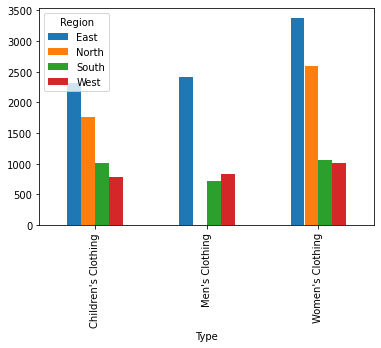

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

ax = f2.plot(kind='bar')
#plt.show()
plt.savefig('wow.png')

In [136]:
from pptx import Presentation
from pptx.util import Inches
prs = Presentation()
img_path = 'wow.png'
blank_slide_layout = prs.slide_layouts[8] # 6 : 제목/내용이 없는 '빈' 슬라이드
slide = prs.slides.add_slide(blank_slide_layout)

title_shape = slide.placeholders[0] # 제목
title_shape.text = 'Sales by account'
body_shape = slide.placeholders[2] # 내용
tf = body_shape.text_frame
tf.text = 'results consistent with last quarter'

left = Inches(3)
width = Inches(5)
height = Inches(5)
pic = slide.shapes.add_picture(img_path, left, top, width=width,height=height)
top = left = Inches(1)

prs.save('wow.pptx')

        Date Region                 Type  Units  Sales
0 2020-07-11   East  Children's Clothing   18.0    306
1 2020-09-23  North  Children's Clothing   14.0    448
2 2020-04-02  South     Women's Clothing   17.0    425
3 2020-02-28   East  Children's Clothing   26.0    832
4 2020-03-19   West     Women's Clothing    3.0     33
Region                 East   North   South    West
Type                                               
Children's Clothing  2318.0  1763.0  1017.0   789.0
Men's Clothing       2420.0     0.0   725.0   829.0
Women's Clothing     3372.0  2596.0  1056.0  1006.0


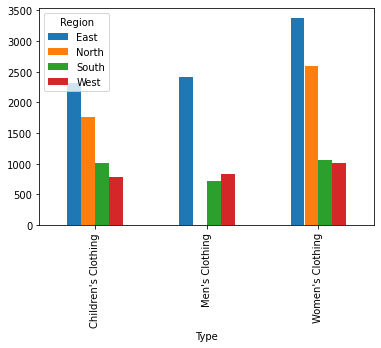

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches

df = pd.read_excel('sample.xlsx', parse_dates=['Date'])
print(df.head())

#multi_index = pd.pivot_table(df, index = ['Region', 'Type'], values = 'Sales', aggfunc = 'sum')
#print(multi_index)
#multi_functions = pd.pivot_table(df, index = ['Region', 'Type'], values = 'Sales', aggfunc = ['sum', len])
#print(multi_functions)

columns_example = pd.pivot_table(df, index='Type', columns = 'Region', values = 'Units', aggfunc = 'sum')
print(columns_example)

fig_plot = columns_example.plot(kind='bar')
fig = fig_plot.get_figure()
fig.savefig('wow.png')

prs = Presentation()
graph_slide_layout = prs.slide_layouts[8]
slide = prs.slides.add_slide(graph_slide_layout)
title = slide.shapes.title
title.text = 'Sales by account'
placeholder = slide.placeholders[1]
pic = placeholder.insert_picture('wow.png')
subtitle = slide.placeholders[2]
subtitle.text = 'Results consistent with last quarter'
prs.save('wow.pptx')